<a href="https://colab.research.google.com/github/archietech-ai/unsupervised/blob/main/K_means_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd

## Create data from Sklearn

In [2]:
from sklearn.datasets import make_blobs

In [3]:
#help(make_blobs)

In [4]:
data = make_blobs(n_samples = 200, n_features = 2, random_state =42)

In [5]:
data

(array([[ 6.50565335,  2.4470026 ],
        [-5.12894273,  9.83618863],
        [-6.89187396, -7.77736396],
        [-8.32771153, -8.28757337],
        [-7.46899195, -6.0305075 ],
        [-6.13233359, -6.26973933],
        [-2.70155859,  9.31583347],
        [-7.3506655 , -6.64805966],
        [ 4.375222  ,  4.69333885],
        [-6.06676507, -6.25048075],
        [ 3.71294836,  1.91364433],
        [ 4.86733877,  3.28031244],
        [ 5.72293008,  3.02697174],
        [ 4.15451529,  2.05504382],
        [ 2.61473625,  2.159624  ],
        [-7.7086222 , -7.44029063],
        [-2.58120774, 10.01781903],
        [-7.70184759, -6.63642238],
        [ 5.32613903,  0.36045381],
        [-5.29361038, -8.11792509],
        [ 6.76203503,  3.00563494],
        [ 4.16493353,  1.31984045],
        [-6.55690863, -7.70734054],
        [-2.44166942,  7.58953794],
        [-6.19767422, -7.19037635],
        [-3.18611962,  9.62596242],
        [-3.6601912 ,  9.38998415],
        [-7.03141229, -6.291

In [6]:
type(data)

tuple

In [7]:
len(data)

2

In [8]:
X = data[0]  # Features of dataset

In [9]:
X

array([[ 6.50565335,  2.4470026 ],
       [-5.12894273,  9.83618863],
       [-6.89187396, -7.77736396],
       [-8.32771153, -8.28757337],
       [-7.46899195, -6.0305075 ],
       [-6.13233359, -6.26973933],
       [-2.70155859,  9.31583347],
       [-7.3506655 , -6.64805966],
       [ 4.375222  ,  4.69333885],
       [-6.06676507, -6.25048075],
       [ 3.71294836,  1.91364433],
       [ 4.86733877,  3.28031244],
       [ 5.72293008,  3.02697174],
       [ 4.15451529,  2.05504382],
       [ 2.61473625,  2.159624  ],
       [-7.7086222 , -7.44029063],
       [-2.58120774, 10.01781903],
       [-7.70184759, -6.63642238],
       [ 5.32613903,  0.36045381],
       [-5.29361038, -8.11792509],
       [ 6.76203503,  3.00563494],
       [ 4.16493353,  1.31984045],
       [-6.55690863, -7.70734054],
       [-2.44166942,  7.58953794],
       [-6.19767422, -7.19037635],
       [-3.18611962,  9.62596242],
       [-3.6601912 ,  9.38998415],
       [-7.03141229, -6.29179239],
       [-2.30033403,

In [10]:
type(X)

numpy.ndarray

## Using Elbow method to find the optimal number of clusters

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 'auto', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # kmeans.inertia_ will give us wcss (Within Cluster sum of square)


In [12]:
wcss

[13142.06918631389,
 7281.718431884727,
 364.4733211131728,
 323.21992189008773,
 273.6199510889021,
 242.48730155289067,
 209.23467812577405,
 172.6654178546068,
 155.07733190136182,
 144.88995430940201]

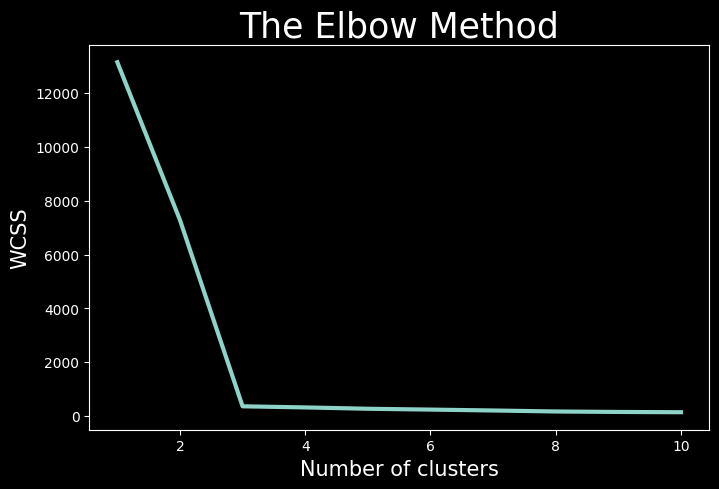

In [13]:
plt.figure(figsize = (8,5))
plt.plot(range(1, 11), wcss, lw = 3)
plt.title('The Elbow Method', fontsize = 25)
plt.xlabel('Number of clusters', fontsize = 15)
plt.ylabel('WCSS', fontsize =15 )
plt.show()

## Applying KMeans

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', n_init = 'auto', random_state = 42)

In [16]:
y_pred = kmeans.fit_predict(X)

In [17]:
y_pred

array([2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2,
       1, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1, 0,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 1, 0, 1, 0, 2, 1, 2, 2, 1,
       2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 2, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2,
       0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 2], dtype=int32)

In [18]:
y_pred.shape

(200,)

In [19]:
sum(y_pred == 0)

67

In [20]:
X[y_pred == 0]     # Data samples of X belongs to cluster 1.

array([[-5.12894273,  9.83618863],
       [-2.70155859,  9.31583347],
       [-2.58120774, 10.01781903],
       [-2.44166942,  7.58953794],
       [-3.18611962,  9.62596242],
       [-3.6601912 ,  9.38998415],
       [-2.30033403,  7.054616  ],
       [-2.14780202, 10.55232269],
       [-2.40954626,  8.51081047],
       [-1.92234053, 11.20474175],
       [-2.41743685,  7.02671721],
       [-3.31769123,  8.51252908],
       [-1.59379551,  9.34303724],
       [-3.05358035,  9.12520872],
       [-1.71816568,  8.10489867],
       [-3.98771961,  8.29444192],
       [-3.11090424, 10.86656431],
       [-3.21125072,  8.68662398],
       [-3.42862186, 10.56422053],
       [-3.57150134,  9.48787856],
       [-1.68665271,  7.79344248],
       [-1.77073104,  9.18565441],
       [-2.18511365,  8.62920385],
       [-3.4172217 ,  7.60198243],
       [-1.10640331,  7.61243507],
       [-2.97867201,  9.55684617],
       [-2.98837186,  8.82862715],
       [-2.52269485,  7.9565752 ],
       [-2.42215055,

In [21]:
X[y_pred == 0,0].reshape(-1,1)  # Data samples of X (from the first feature of X) belongs to cluster 1
                                # In [y_pred == 0,0], the first zero represents the cluster number and
                                # second zero represents the feature number or column number.

array([[-5.12894273],
       [-2.70155859],
       [-2.58120774],
       [-2.44166942],
       [-3.18611962],
       [-3.6601912 ],
       [-2.30033403],
       [-2.14780202],
       [-2.40954626],
       [-1.92234053],
       [-2.41743685],
       [-3.31769123],
       [-1.59379551],
       [-3.05358035],
       [-1.71816568],
       [-3.98771961],
       [-3.11090424],
       [-3.21125072],
       [-3.42862186],
       [-3.57150134],
       [-1.68665271],
       [-1.77073104],
       [-2.18511365],
       [-3.4172217 ],
       [-1.10640331],
       [-2.97867201],
       [-2.98837186],
       [-2.52269485],
       [-2.42215055],
       [-3.92456837],
       [-4.05986105],
       [-2.54390939],
       [-3.34841515],
       [-2.90130578],
       [-2.85191214],
       [-2.21307735],
       [-2.16557933],
       [-3.03895783],
       [-4.23411546],
       [-2.96983639],
       [-2.62484591],
       [-3.49973395],
       [-2.17793419],
       [-1.69568041],
       [-1.4781981 ],
       [-1

In [22]:
X[y_pred == 0, 1].reshape(-1,1) # Samples of X ( from the second feature of X )  belongs to cluster 01

array([[ 9.83618863],
       [ 9.31583347],
       [10.01781903],
       [ 7.58953794],
       [ 9.62596242],
       [ 9.38998415],
       [ 7.054616  ],
       [10.55232269],
       [ 8.51081047],
       [11.20474175],
       [ 7.02671721],
       [ 8.51252908],
       [ 9.34303724],
       [ 9.12520872],
       [ 8.10489867],
       [ 8.29444192],
       [10.86656431],
       [ 8.68662398],
       [10.56422053],
       [ 9.48787856],
       [ 7.79344248],
       [ 9.18565441],
       [ 8.62920385],
       [ 7.60198243],
       [ 7.61243507],
       [ 9.55684617],
       [ 8.82862715],
       [ 7.9565752 ],
       [ 8.71527878],
       [ 8.59364081],
       [ 9.0828491 ],
       [ 7.84560809],
       [ 8.70507375],
       [ 7.55077118],
       [ 8.21200886],
       [ 9.2753414 ],
       [ 7.25124597],
       [ 9.52755356],
       [ 8.4519986 ],
       [10.07140835],
       [ 8.71318243],
       [ 8.4479884 ],
       [ 9.98983126],
       [ 7.78342181],
       [ 9.94556625],
       [ 8

In [23]:
kmeans.cluster_centers_

array([[-2.65882129,  8.95756821],
       [-6.74539381, -6.85144337],
       [ 4.63218228,  2.10121377]])

## Visualize the clusters

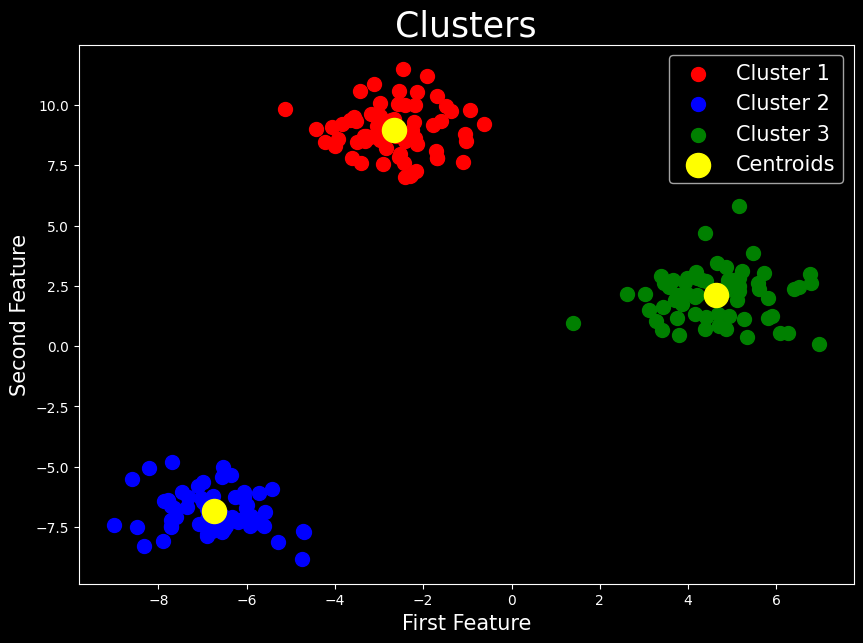

In [24]:
plt.figure(figsize = (10,7))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters', fontsize = 25)
plt.xlabel('First Feature', fontsize = 15)
plt.ylabel('Second Feature', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

# Evaluating K-means performance by Calinski-Harabasz ( CH ) Index

In [25]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

3453.183319092555

## For two clusters

In [26]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init = 'auto', random_state = 42)
y_pred = kmeans.fit_predict(X)

In [27]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

159.351046079468

## For Four Clusters

In [28]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', n_init = 'auto',  random_state = 42)
y_pred = kmeans.fit_predict(X)

In [29]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

2591.1093197626315

## For 10 Clusters

In [30]:
kmeans = KMeans(n_clusters = 10, init = 'k-means++', n_init = 'auto',  random_state = 42)
y_pred = kmeans.fit_predict(X)

In [31]:
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

1893.7468522623974